Problem statement 1


In [2]:
# Installing the packages
!pip install yfinance

In [3]:
# importing the necessary libraraies
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd


In [4]:
#start and end date for our market data used
end_date = datetime(year=2023, month=12, day=31)
start_date = datetime(year=2023, month=1, day=1)

In [5]:
# Market data for single ticker
ticker = "AAPL"

# download market data for a single ticker
df_single = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)
df_single


Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2023-01-03  128.613978  129.226044  122.582112  123.470604  112117500
2023-01-04  125.267347  127.014716  123.480495  124.744125   89113600
2023-01-05  125.504275  126.136090  123.164587  123.421257   80962700
2023-01-06  124.398582  128.623840  123.292902  127.962410   87754700
2023-01-09  128.801541  131.703947  128.228957  128.485626   70790800
...                ...         ...         ...         ...        ...
2023-12-22  193.761051  193.989390  191.567126  192.192551   37122800
2023-12-26  192.202487  192.480450  191.428159  191.646561   28919300
2023-12-27  191.090629  192.093281  189.700797  191.745819   48087700
2023-12-28  192.728641  193.244865  191.765691  192.172714   34049900
2023-12-29  192.490361  192.986726  190.336138  191.130325   42628800

[250 rows x 5 columns]

In [6]:
# clean the data
df_single.dropna(inplace=True)


In [7]:
df_single.isnull().sum()

Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [8]:
print(df_single.columns)


MultiIndex([('AAPL',   'Open'),
            ('AAPL',   'High'),
            ('AAPL',    'Low'),
            ('AAPL',  'Close'),
            ('AAPL', 'Volume')],
           names=['Ticker', 'Price'])


In [10]:
!pip install plotly

In [11]:
df_itc=df_single['AAPL']
df_itc.info()
df_itc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


,0
Price,
Open,0
High,0
Low,0
Close,0
Volume,0


In [15]:
# 2. Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_itc.index,open=df_single['AAPL']['Open'],high=df_single['AAPL']['High'],low=df_single['AAPL']['Low'],close=df_single['AAPL']['Close'],    increasing_line_color='green',
    decreasing_line_color='red')])

# 3. Customize the chart (optional)
fig.update_layout(title=" Candlestick Chart for AAPL",
                      xaxis_title="Date",
                      yaxis_title="Price",
                      xaxis_rangeslider_visible=False) # Remove the date slider

# 4. Display the chart
fig.show()

In [37]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-05-31 125448.png to Screenshot 2025-05-31 125448.png


### 🔍 My Observations

1. **July 31, 2023 – Sudden Drop 📉**  
   The stock price dropped sharply, shown by a big red candlestick. This might have been caused by bad news or a poor quarterly report.

2. **October 27, 2023 – Uptrend Starts 📈**  
   The stock started rising again after a period of falling. Maybe Apple announced a new product or the market turned positive.


`Problem Statement 2`

<ipython-input-41-5a9775e8de65>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-5a9775e8de65>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



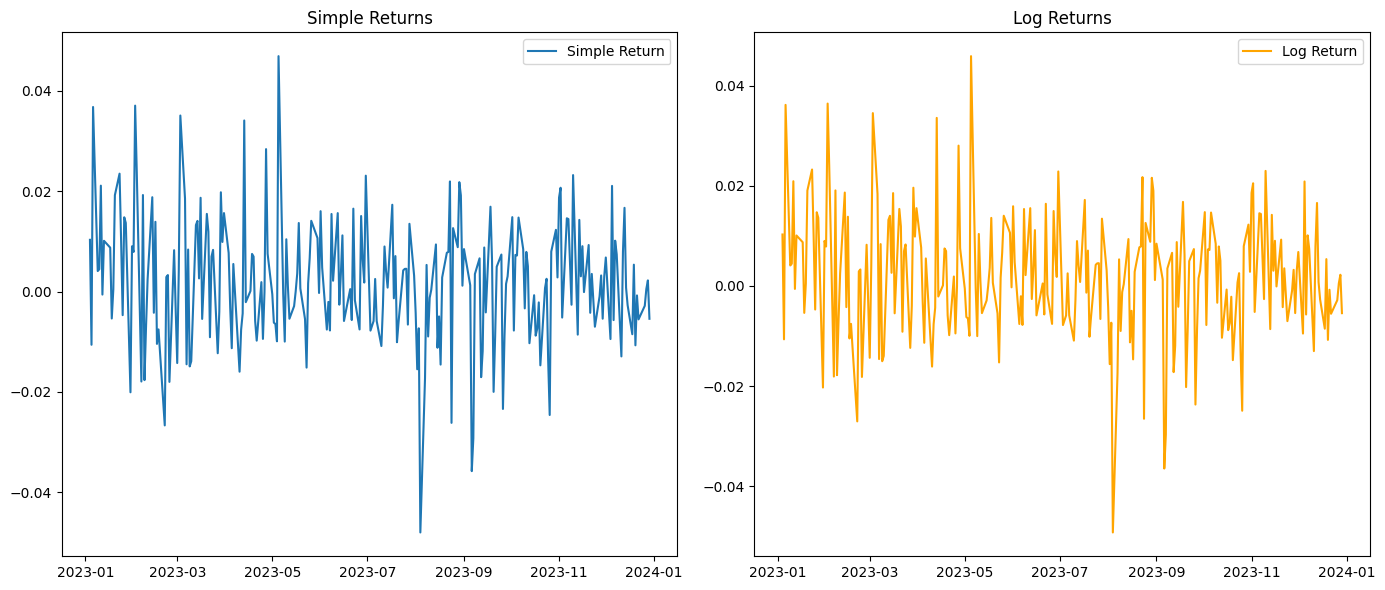

In [41]:
import numpy as np
# Assuming you have a DataFrame `df` with a 'Price' or 'Close' column
df_itc['Simple Return'] = df_itc['Close'].pct_change()
df_itc['Log Return'] = np.log(df_itc['Close'] / df_itc['Close'].shift(1))

# Plotting both
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df_itc['Simple Return'], label='Simple Return')
plt.title('Simple Returns')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_itc['Log Return'], label='Log Return', color='orange')
plt.title('Log Returns')
plt.legend()

plt.tight_layout()
plt.show()


if we consider closing by openig ratio to be x then simple return = x-1 and log return becomes ln(x) so they have a root at x=1 so when the ratio becomes almost equal the values also become almost equal they might differ in the value when the ratio exceeds 2 or goes below 1

In [45]:
df_itc['rolling_volatility'] = df_itc['Log Return'].rolling(window=14).std()
print(df_itc['rolling_volatility'])
df_itc['rolling_volatility'] =df_itc['rolling_volatility'].fillna(0)
df_itc.head()


Date
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-09         NaN
                ...   
2023-12-22    0.010199
2023-12-26    0.008590
2023-12-27    0.008440
2023-12-28    0.007988
2023-12-29    0.007778
Name: rolling_volatility, Length: 250, dtype: float64


<ipython-input-45-6152c5a97c39>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-6152c5a97c39>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price,Open,High,Low,Close,Volume,Simple Return,Log Return,rolling_volatility
Date,,,,,,,,
2023-01-03,128.613978,129.226044,122.582112,123.470604,112117500,NaN,NaN,0.0
2023-01-04,125.267347,127.014716,123.480495,124.744125,89113600,0.010314,0.010262,0.0
2023-01-05,125.504275,126.136090,123.164587,123.421257,80962700,-0.010605,-0.010661,0.0
2023-01-06,124.398582,128.623840,123.292902,127.962410,87754700,0.036794,0.036133,0.0
2023-01-09,128.801541,131.703947,128.228957,128.485626,70790800,0.004089,0.004080,0.0


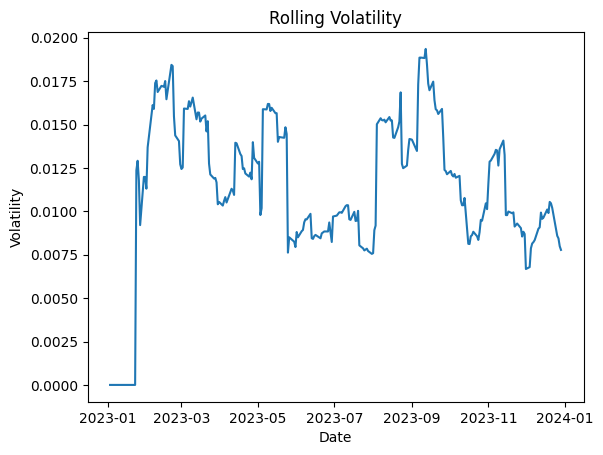

In [46]:
plt.plot(df_itc.index, df_itc['rolling_volatility'])
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

Simple returns show how much a price has gone up or down in percentage terms. Log returns use a formula that’s better for long-term math and analysis. They look almost the same for small changes, but during big price moves, they can be noticeably different.



Problem Statement 3


In [47]:
!pip install scipy

PART 1

In [48]:
df_itc['Type ']="DOWN"
df_itc.loc[df_itc['Simple Return']>0,'Type ']="UP"
df_itc.head()

<ipython-input-48-93a037ce1835>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price,Open,High,Low,Close,Volume,Simple Return,Log Return,rolling_volatility,Type
Date,,,,,,,,,
2023-01-03,128.613978,129.226044,122.582112,123.470604,112117500,NaN,NaN,0.0,DOWN
2023-01-04,125.267347,127.014716,123.480495,124.744125,89113600,0.010314,0.010262,0.0,UP
2023-01-05,125.504275,126.136090,123.164587,123.421257,80962700,-0.010605,-0.010661,0.0,DOWN
2023-01-06,124.398582,128.623840,123.292902,127.962410,87754700,0.036794,0.036133,0.0,UP
2023-01-09,128.801541,131.703947,128.228957,128.485626,70790800,0.004089,0.004080,0.0,UP


In [49]:
prob_up = (df_itc['Type '] == 'UP').sum() / len(df_itc)
print("the probability of UP is : ",prob_up)

the probability of UP is :  0.56


In [51]:
# Probability using 10 coins P(UP)
from scipy.stats import binom
binom_prob_6=binom.pmf(k=6,n=10,p=prob_up)
binom_prob_8 = binom.pmf(k=8, n=10, p=prob_up)+binom.pmf(k=10, n=10, p=prob_up)+binom.pmf(k=9, n=10, p=prob_up)
print("probability of exactly 6 UP coins is : ",binom_prob_6)
print("probability of more than or equal to 8 UP coins is : ",binom_prob_8)

probability of exactly 6 UP coins is :  0.24274939864374323
probability of more than or equal to 8 UP coins is :  0.11112432230608152


In [52]:
#Stimulation
simulations = np.random.binomial(n=10, p=prob_up, size=1000)
sim_exact_6 = np.sum(simulations == 6)
sim_at_least_8 = np.sum(simulations >= 8)
print(f"Simulated P(exactly 6 UP days): {sim_exact_6 / 1000:.4f}")
print(f"Simulated P(at least 8 UP days): {sim_at_least_8 / 1000:.4f}")

Simulated P(exactly 6 UP days): 0.2290
Simulated P(at least 8 UP days): 0.1190


PART 2


In [53]:
up_days = df_itc[df_itc['Simple Return'] > 0]
down_days =df_itc[df_itc['Simple Return'] <= 0]
avg_up_return = up_days['Simple Return'].mean()
avg_down_return = down_days['Simple Return'].mean()
print(f"Average UP Day Return: {avg_up_return:.4f}")
print(f"Average DOWN Day Return: {avg_down_return:.4f}")

Average UP Day Return: 0.0103
Average DOWN Day Return: -0.0090


In [54]:
total_return = 6 * avg_up_return + 4 * avg_down_return
print(f"Total Return over 10 days: {total_return:.4f}")

Total Return over 10 days: 0.0256


PART 3

In [55]:
Expected_value = df_itc['Simple Return'].mean()
print("expected value of the returns is",Expected_value)
Expected_bet = prob_up*100-(1-prob_up)*150
print("expected bet is",Expected_bet)

expected value of the returns is 0.0018349274317235155
expected bet is -9.999999999999979


Someone offers me a bet where I win ₹100 if the stock goes up and lose ₹150 if it goes down. To decide, I calculated the expected value, which tells us the average outcome if we take this bet many times.

Using real data, I found the probability of the stock going up (prob_up) and calculated the expected return as:
Expected Bet = (prob_up × 100) - [(1 - prob_up) × 150] =
(0.56 x 100) - (0.44 x 150) = -₹10.

From the code output, the expected bet value is -10. This means that on average, I lose ₹10 every time I take the bet. So, even though I might win sometimes, the losses are bigger than the wins. It’s a bad deal long-term.
I would not take the bet. Even with a high win rate, the math proves I’ll still lose money overall.